In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy
import pandas
import scipy
import scipy.stats


In [3]:
import os
import glob

os.chdir("C:\Users\colinsh\Box Sync\Winter 2015\CMPLXSYS 530\ACO Data")
os.listdir("./")
# Using os.listdir to show the output directory
os.listdir("output_first")[0:5]

# Using glob to list the output directory
glob.glob("output_first/run-*")[0:5]

['output_first\\run-20150425-0',
 'output_first\\run-20150425-1',
 'output_first\\run-20150425-2',
 'output_first\\run-20150425-3',
 'output_first\\run-20150425-4']

In [51]:
# Create "complete" data frames
results = pandas.DataFrame()

# Iterate over all directories
for run_directory in glob.glob("output_first/run-*"):
    # Get the run ID from our directory name
    run_id = os.path.basename(run_directory)
    
    # Get the run results
    run_results_data = pandas.read_csv(os.path.join(run_directory, "run_results.csv"))
    
    # Generate distance to utopia data
    ini_dist_utopia_1=run_results_data['ini_utopia_obj1']-1 # optimal survivability is 1
    last_dist_utopia_1=run_results_data['last_utopia_obj1']-1
    ini_dist_utopia_2=run_results_data['ini_utopia_obj2'] # optimal complexity is 0
    last_dist_utopia_2=run_results_data['last_utopia_obj2']
    
    ini_dist_utopia=numpy.sqrt(ini_dist_utopia_1**2+ini_dist_utopia_2**2) #distance to utopia
    last_dist_utopia=numpy.sqrt(last_dist_utopia_1**2+last_dist_utopia_2**2) 
    
    # Add to run results
    run_results_data['ini_dist_utopia']=ini_dist_utopia
    run_results_data['last_dist_utopia']=last_dist_utopia
    
    # Compile into dataframe
    results=results.append(run_results_data)

    

          0         1         2
0  1.000000 -0.287789  0.245980
1 -0.287789  1.000000 -0.352618
2  0.245980 -0.352618  1.000000


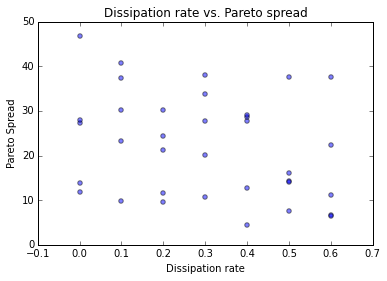

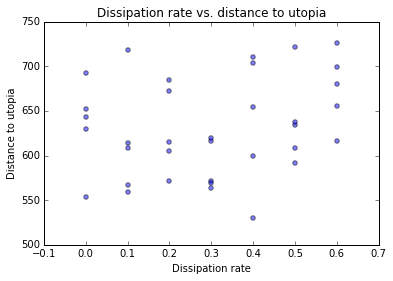

In [64]:
#Analyze the spread and distance to utopia progressions
progression=pandas.DataFrame()

for index, row in results.iterrows():
    progression=progression.append([[row['dissipation_rate'],
                                    row['last_spread'],
                                    row['last_dist_utopia']]])
    
# Check correlation of spread change and approach to utopia with dissipation rate.
#print progression.corr()

f = plt.figure()
plt.scatter(results['dissipation_rate'],
           results['last_spread'],
            alpha=0.5)
plt.xlabel("Dissipation rate")
plt.ylabel("Pareto Spread")
plt.title("Dissipation rate vs. Pareto spread")    

f = plt.figure()
plt.scatter(results['dissipation_rate'],
           results['last_dist_utopia'],
            alpha=0.5)
plt.xlabel("Dissipation rate")
plt.ylabel("Distance to utopia")
plt.title("Dissipation rate vs. distance to utopia")    
